# Heart-Disease-Prediction

In [1]:
import pandas as pd
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [2]:
df.shape

(270, 14)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
df['Heart Disease'] = df['Heart Disease'].replace('Absence',0)
df['Heart Disease'] = df['Heart Disease'].replace('Presence',1)


In [6]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

In [7]:
categorial_features = ['Sex','Chest pain type','FBS over 120','EKG results','Exercise angina','Slope of ST','Number of vessels fluro','Thallium']
df[categorial_features] = df[categorial_features].astype('category')

In [8]:
df.dtypes
df_cp=df.drop(['Heart Disease'],axis=1)

In [9]:
continous_features = set(df_cp.columns)-set(categorial_features)
scaler = StandardScaler()
df_norm = df_cp.copy()
df_norm[list(continous_features)] = scaler.fit_transform(df[list(continous_features)])

In [10]:
df_norm_dummies = pd.get_dummies(df_norm)

In [11]:
df_norm_dummies

,Age,BP,Cholesterol,Max HR,ST depression,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,1.382140,-0.916759,6.093004,0.446409,0.481153,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,2.280369,-0.981951,0.532904,-0.481153,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
266,-1.147506,-0.636310,0.258589,1.008625,-0.918565,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
267,0.172309,0.485490,0.859476,0.143677,0.218706,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
268,0.282294,0.485490,-1.117635,-0.072560,-0.568636,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [12]:
X = df_cp
y = df['Heart Disease']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.15,random_state = 42) 

## Model Evaluation

In [14]:
models = [SVC(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier()]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


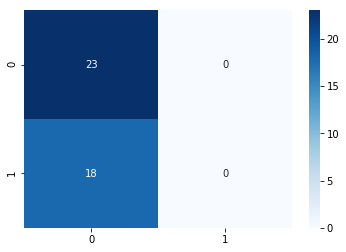

             precision    recall  f1-score   support

          0       0.56      1.00      0.72        23
          1       0.00      0.00      0.00        18

avg / total       0.31      0.56      0.40        41

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/home/arun/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


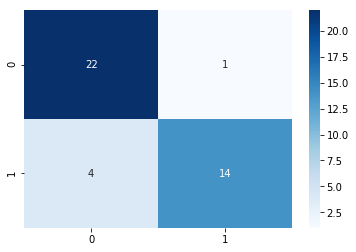

             precision    recall  f1-score   support

          0       0.85      0.96      0.90        23
          1       0.93      0.78      0.85        18

avg / total       0.88      0.88      0.88        41

GaussianNB(priors=None)


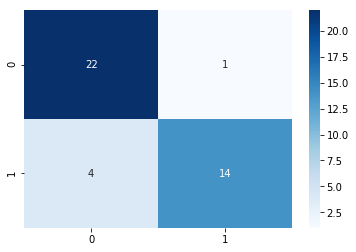

             precision    recall  f1-score   support

          0       0.85      0.96      0.90        23
          1       0.93      0.78      0.85        18

avg / total       0.88      0.88      0.88        41

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


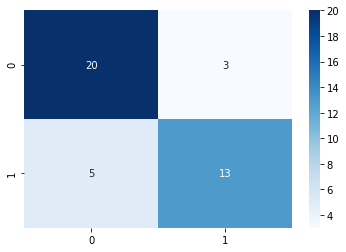

             precision    recall  f1-score   support

          0       0.80      0.87      0.83        23
          1       0.81      0.72      0.76        18

avg / total       0.81      0.80      0.80        41



In [15]:
for model in models:
    print(model)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(Y_test, y_pred),annot = True, cmap = plt.cm.Blues)
    plt.show()
    print(classification_report(Y_test, y_pred))

### Logistic Regression has 93% of accuracy which is greater than the other Model

## Save the Model using Pickle

In [16]:
log_reg=LogisticRegression()
model1=log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)

In [17]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(log_reg,file)